# Cats and dogs

In [1]:
import os, shutil
import zipfile

from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

Using TensorFlow backend.


### Define folders

In [2]:
original_dataset_dir = './cats_and_dogs_org/'
base_dir = './cats_and_dogs_small/'

### Download data from kaggle

In [3]:
#!pip install kaggle

In [4]:
if not os.path.exists(original_dataset_dir):
    #for the following step it is necessary having a token: https://github.com/Kaggle/kaggle-api
    os.system("kaggle competitions download -c dogs-vs-cats -p" + original_dataset_dir)
    print("Data downloaded from kaggle")
    
    with zipfile.ZipFile(original_dataset_dir+'/test1.zip',"r") as zip_ref:
        zip_ref.extractall(original_dataset_dir)
    print("test unzipped")
    
    with zipfile.ZipFile(original_dataset_dir+'/train.zip',"r") as zip_ref:
        zip_ref.extractall(original_dataset_dir)
    print("train unzipped")

### Create folders for train, validaton and test and move files

In [5]:
if not os.path.exists(base_dir):
    
    # Create folders
    
    os.mkdir(base_dir)

    train_dir = os.path.join(base_dir, 'train')
    os.mkdir(train_dir)
    validation_dir = os.path.join(base_dir, 'validation')
    os.mkdir(validation_dir)
    test_dir = os.path.join(base_dir, 'test')
    os.mkdir(test_dir)


    train_cats_dir = os.path.join(train_dir, 'cats')
    os.mkdir(train_cats_dir) #Directory with training cat pictures

    train_dogs_dir = os.path.join(train_dir, 'dogs')
    os.mkdir(train_dogs_dir) #Directory with training dog pictures

    validation_cats_dir = os.path.join(validation_dir, 'cats')
    os.mkdir(validation_cats_dir) # Directory with validation cat pictures

    validation_dogs_dir = os.path.join(validation_dir, 'dogs')
    os.mkdir(validation_dogs_dir) #Directory with validation dog pictures

    test_cats_dir = os.path.join(test_dir, 'cats')
    os.mkdir(test_cats_dir) #Directory with test cat pictures

    test_dogs_dir = os.path.join(test_dir, 'dogs')
    os.mkdir(test_dogs_dir) #Directory with test dog pictures
    
    
    # Move files
    
    fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir+'/train/', fname)
        dst = os.path.join(train_cats_dir, fname)
        shutil.copyfile(src, dst)

        
    fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir+'/train/', fname)
        dst = os.path.join(validation_cats_dir, fname)
        shutil.copyfile(src, dst)


    fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir+'/train/', fname)
        dst = os.path.join(test_cats_dir, fname)
        shutil.copyfile(src, dst)


    fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir+'/train/', fname)
        dst = os.path.join(train_dogs_dir, fname)
        shutil.copyfile(src, dst)


    fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir+'/train/', fname)
        dst = os.path.join(validation_dogs_dir, fname)
        shutil.copyfile(src, dst)


    fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir+'/train/', fname)
        dst = os.path.join(test_dogs_dir, fname)
        shutil.copyfile(src, dst)
        
else:
    train_dir = os.path.join(base_dir, 'train')
    validation_dir = os.path.join(base_dir, 'validation')
    test_dir = os.path.join(base_dir, 'test')
    train_cats_dir = os.path.join(train_dir, 'cats')
    train_dogs_dir = os.path.join(train_dir, 'dogs')
    validation_cats_dir = os.path.join(validation_dir, 'cats')
    validation_dogs_dir = os.path.join(validation_dir, 'dogs')
    test_cats_dir = os.path.join(test_dir, 'cats')
    test_dogs_dir = os.path.join(test_dir, 'dogs')    
        


### Print summary  

In [6]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


# Build network

In [7]:
def get_model(): 
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    return model

In [8]:
model = get_model()

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

# Compile

In [10]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

# Data preprocessing
(create data generators)

In [11]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), 
                                                    batch_size=20, class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150),
                                                        batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Small extract as example

In [13]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


# Fit

In [14]:
%%time

#11m for 30 epochs

#Note: steps_per_epoch=100 so 100*20=2000 where 20 is the dimension of the batch and 2000 is the total train images
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=10,
                              validation_data=validation_generator, validation_steps=50)

Epoch 1/10
100/100 [==============================] - 22s 221ms/step - loss: 0.6924 - acc: 0.5185 - val_loss: 0.6792 - val_acc: 0.5590
Epoch 2/10
100/100 [==============================] - 21s 211ms/step - loss: 0.6581 - acc: 0.6105 - val_loss: 0.6402 - val_acc: 0.6330
Epoch 3/10
100/100 [==============================] - 21s 209ms/step - loss: 0.6156 - acc: 0.6665 - val_loss: 0.6652 - val_acc: 0.5920
Epoch 4/10
100/100 [==============================] - 21s 209ms/step - loss: 0.5792 - acc: 0.6985 - val_loss: 0.5968 - val_acc: 0.6690
Epoch 5/10
100/100 [==============================] - 21s 207ms/step - loss: 0.5462 - acc: 0.7150 - val_loss: 0.5901 - val_acc: 0.6690
Epoch 6/10
100/100 [==============================] - 21s 210ms/step - loss: 0.5160 - acc: 0.7400 - val_loss: 0.6428 - val_acc: 0.6440
Epoch 7/10
100/100 [==============================] - 21s 210ms/step - loss: 0.4831 - acc: 0.7700 - val_loss: 0.6539 - val_acc: 0.6560
Epoch 8/10
100/100 [==============================] - 2

# Save model

In [15]:
model.save(base_dir+'/cats_and_dogs_small_1.h5')

# Plots

In [16]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

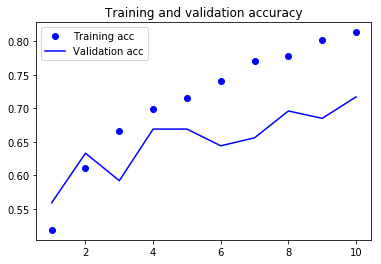

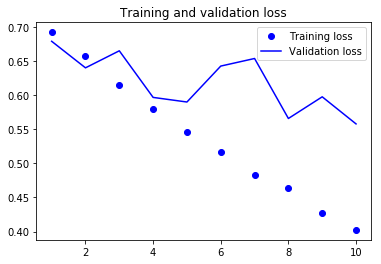

In [17]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()